<a href="https://colab.research.google.com/github/Kamrul732/dataScience/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Classroom/DataScience/game data.csv')

In [4]:
df

,Days,Outlook,Temprature,Routine,Wear Jacket?
0,1,Sunny,Cold,Indoor,No
1,2,Cloudy,Cold,Indoor,Yes
2,3,Cloudy,Warm,Outdoor,No
3,4,Sunny,Cold,Outdoor,Yes
4,5,Cloudy,Cold,Outdoor,Yes
5,6,Sunny,Warm,Outdoor,No
6,7,Cloudy,Warm,Indoor,No
7,8,Sunny,Warm,Indoor,No


In [5]:
df = df.drop(['Days'], axis=1)

In [6]:
df

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes
5,Sunny,Warm,Outdoor,No
6,Cloudy,Warm,Indoor,No
7,Sunny,Warm,Indoor,No


In [7]:
df.isnull().sum()

,0
Outlook,0
Temprature,0
Routine,0
Wear Jacket?,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Outlook       8 non-null      object
 1   Temprature    8 non-null      object
 2   Routine       8 non-null      object
 3   Wear Jacket?  8 non-null      object
dtypes: object(4)
memory usage: 384.0+ bytes


In [9]:
df.value_counts()

Outlook  Temprature  Routine  Wear Jacket?
Cloudy   Cold        Indoor   Yes             1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Sunny    Cold        Indoor   No              1
                     Outdoor  Yes             1
         Warm        Indoor   No              1
                     Outdoor  No              1
Name: count, dtype: int64

In [10]:
df['Outlook'].value_counts()

,count
Outlook,
Sunny,4
Cloudy,4


In [11]:
df['Routine'].value_counts()

,count
Routine,
Indoor,4
Outdoor,4


In [12]:
df['Temprature'].value_counts()

,count
Temprature,
Cold,4
Warm,4


In [13]:
x = df.drop(['Wear Jacket?'], axis=1)
y = df[['Wear Jacket?']]

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [15]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

[Lambda](https://youtu.be/MvWMpCK5ZHM?list=PLKdU0fuY4OFf7qj4eoBtvALAB_Ml2rN0V)

In [16]:
x[['Outlook', 'Temprature', 'Routine']] = x[['Outlook', 'Temprature', 'Routine']].apply(lambda col: le.fit_transform(col)) #lambda arguments: expression

In [17]:
x.head()

,Outlook,Temprature,Routine
0,1,0,0
1,0,0,0
2,0,1,1
3,1,0,1
4,0,0,1


In [18]:
df.head()

,Outlook,Temprature,Routine,Wear Jacket?
0,Sunny,Cold,Indoor,No
1,Cloudy,Cold,Indoor,Yes
2,Cloudy,Warm,Outdoor,No
3,Sunny,Cold,Outdoor,Yes
4,Cloudy,Cold,Outdoor,Yes


Outlook -> 'Cloudy':0 , 'Sunny': 1 <br>
Temperature -> 'Cold':0, 'Warm':1  <br>
Routine-> 'Indoor ':0, 'Outdoor':1 <br>

# Decision Tree Classifier

Sklearn: [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

In [19]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [20]:
clf.fit(x,y)

DecisionTreeClassifier()

In [21]:
clf.predict([[1, 0, 0]]) # Sunny, Cold , Indoor= No

array(['No'], dtype=object)

In [22]:
clf.predict([[1, 1, 0]]) # Sunny, warm , Indoor= No

array(['No'], dtype=object)

In [23]:
clf.predict([[1, 0, 1]]) # Sunny, Cold , Outdoor= Yes

array(['Yes'], dtype=object)

In [24]:
#clf.score(x,y)

[Text(0.6666666666666666, 0.875, 'x[1] <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'x[2] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.75, '  False')]

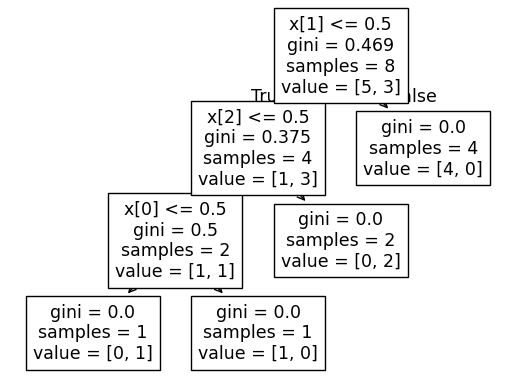

In [25]:
tree.plot_tree(clf)

In [26]:
x.columns

Index(['Outlook', 'Temprature', 'Routine'], dtype='object')

[Text(0.6666666666666666, 0.875, 'Temprature <= 0.5\ngini = 0.469\nsamples = 8\nvalue = [5, 3]'),
 Text(0.5, 0.625, 'Routine <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'Outlook <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.75, 0.75, '  False')]

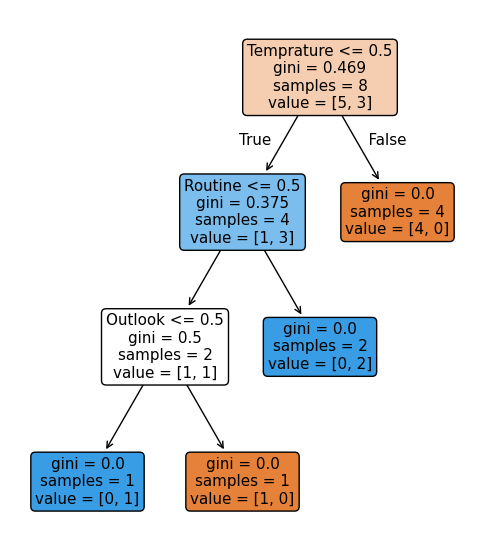

In [27]:
plt.figure(figsize=(6,7))
tree.plot_tree(clf, feature_names=x.columns, filled=True, rounded=True )